In [5]:
import os
import numpy as np

from remi import (System,
                  load_ee_func,
                  load_Je_func,
                  load_position_func,
                  plot_states,
                  plot_controls)

In [2]:
# Physical Parameters
r_s = np.array([-1.5, 0.])
r_t = np.array([1.5, 0.])
rho = np.array([0.5, 0.5, 0.5, 0.5])
m = np.array([250., 25., 25., 180.])
I = np.array([25., 2.5, 2.5, 18.])
b = np.array([1., 1., 1.])

# Simulation Settings
t_dur = 10.
step_size = 0.01
tol = 0.01
max_tau = (10., 10., 10.)

# Initial Conditions
y0 = np.array([0., 0., 0., 0., np.deg2rad(5.), np.deg2rad(10.), 0., np.deg2rad(-5.)])


# Put parameters and settings in dict
parameters = dict(r_s=r_s,
                  r_t=r_t,
                  rho=rho,
                  m=m,
                  I=I,
                  b=b)

settings = dict(t_dur=t_dur,
                step_size=step_size,
                tol=tol,
                max_tau=max_tau)

# Define system
sys = System(y0, parameters, settings)

We can still use the Je function previously obtained with sympy, but it
may be good to have separate functions for each critical point.

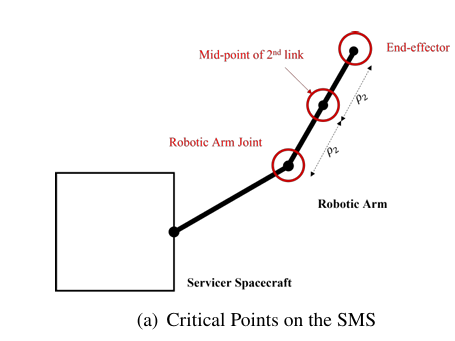

Shouldn't be too difficult to do that manually w/o the sympy stuff.

Should also calculate the obstacle points on the target satellite.

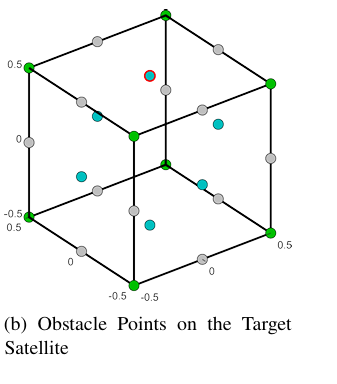

Just each midpoint on the satellite and the corners.

Should also specify the capture point specifically.

In [ ]:
Je_func = load_Je_func()

NOTE: looks like we'll need the time derivative of Je.

Also looks like we need an expression to calculate the derivative of the
gamma functions with respect to q, and get that time derivative...

Maybe we could use jax? Or some other numerical technique. Does not
look trivial at all.

In [8]:
def Je_pinv_func(y):
    Je = Je_func(y, rho)
    return Je.T@np.linalg.inv(Je@Je.T)

In [ ]:
## Calculate critical points on SMS
# Robotic arm joint
def cp1(y):
    pass

# Mid-point of 2nd link
def cp2(y):
    pass

# End effector
def cp3(y):
    pass

def calc_cps(y):
    return np.array([cp1(y), cp2(y), cp3(y)])

In [ ]:
## Calculate Obstacle points on target
def calc_obst_pts(y):
    pass

def calc_capt_pt(y):
    pass

Overall this will give us the desired joint accelerations. From this,
we'll need to take the dynamics and back-solve to get the appropriate
torques. We'll probably need to utilize sympy to do that too.

In [3]:
def event(t, y, tol):
    pass

def controls(t, y):
    pass

In [4]:
sys.set_controller(controls)
sys.set_event(event)

In [ ]:
sol = sys.run()

In [ ]:
print(f'STATUS = {sol.status}')

In [ ]:
plot_states(sol.t, sol.y, save=False, show=True)

In [ ]:
plot_controls(sol.t, sol.u, save=False, show=True)